# ERROR Analysis

In [1]:
from rnn_classifier import MweRNN
import rnn_dataset
import mlp_dataset
import os
import matplotlib.pyplot as plt
from mlp_classifier import MLPClassifier
import matplotlib.pyplot as plt
from collections import Counter

In [10]:
trainset     = mlp_dataset.MWEDataset("corpus/train.conllu", isTrain = True)
testset      = mlp_dataset.MWEDataset("corpus/test.conllu")

token Vocab size 35693
token Vocab size 35693


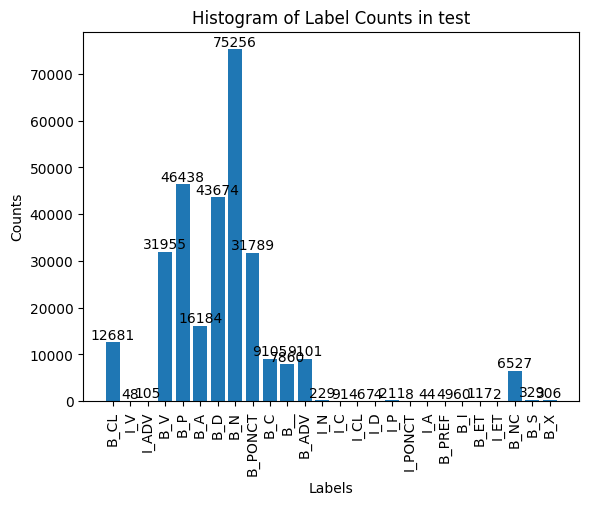

In [13]:
labels, counts = zip(*trainset.tags_dist.items())

plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Histogram of Label Counts in train')
plt.xticks(rotation=90)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

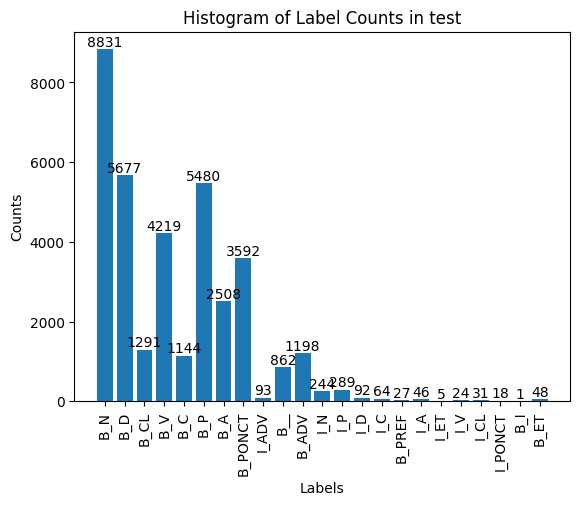

In [12]:
labels, counts = zip(*testset.tags_dist.items())

plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Histogram of Label Counts in test')
plt.xticks(rotation=90)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# RNN classifier error analysis

In [8]:
trainset     = rnn_dataset.RnnDataset("corpus/train.conllu", isTrain = True)
testset      = rnn_dataset.RnnDataset("corpus/test.conllu")

token Vocab size 35693
token Vocab size 35693


In [9]:
mod_dir = "trained_models"
rnn_mod = "rnn_mod.pth"
toksfile= "toks.txt"
tagsfile= "tags_posbi.txt"
model, toks_vocab, tags_vocab = MweRNN.load(os.path.join(mod_dir, rnn_mod), "RNN",
                                                                   os.path.join(mod_dir, toksfile),
                                                                   os.path.join(mod_dir, tagsfile), embsize=64, hidden_size=64, drop_out=0.1, device="cpu")

model.to("cpu")
model.eval()

MweRNN(
  (word_embedding): Embedding(35693, 64)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (crf): CRF(
    (fc): Linear(in_features=64, out_features=30, bias=True)
  )
  (rnn): RNN(64, 32, batch_first=True, bidirectional=True)
)

In [10]:
class_counts, TP, FP, FN, average_precision, average_recall, average_f1_score, weighted_f1_score, weighted_recall, weighted_precision = model.evaluate(testset.get_loader(batch_size = 500))

100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.37s/it]


In [11]:
precision = TP/(FP+TP)
recall    = TP/(FN+TP)
f_score   = 2*(precision*recall)/(precision+recall)

In [12]:
print("tags-------class count --------recall----------precision---------f-score")
for tag in range(len(model.tags_vocab)):
    print(f"{model.tags_vocab.rev_lookup(tag)} %d   | Precision %.4f | Recall  %.4f |  F-score  %.4f   " % (int(class_counts[tag]), float(recall[tag]), float(precision[tag]), float(f_score[tag])))
    print()
print(f"weighted Precision %.4f | Recall  %.4f |  F-score  %.4f   " % (weighted_f1_score, weighted_recall, weighted_precision))

tags-------class count --------recall----------precision---------f-score
<unk> 0   | Precision nan | Recall  nan |  F-score  nan   

<pad> 0   | Precision nan | Recall  nan |  F-score  nan   

B_CL 1291   | Precision 0.8830 | Recall  0.9253 |  F-score  0.9037   

I_V 24   | Precision 0.0000 | Recall  0.0000 |  F-score  nan   

I_ADV 93   | Precision 0.0000 | Recall  nan |  F-score  nan   

B_V 4219   | Precision 0.9166 | Recall  0.8070 |  F-score  0.8583   

B_P 5480   | Precision 0.9602 | Recall  0.8961 |  F-score  0.9271   

B_A 2508   | Precision 0.6260 | Recall  0.8272 |  F-score  0.7127   

B_D 5677   | Precision 0.8806 | Recall  0.9684 |  F-score  0.9224   

B_N 8831   | Precision 0.9071 | Recall  0.8930 |  F-score  0.9000   

B_PONCT 3592   | Precision 1.0000 | Recall  0.9687 |  F-score  0.9841   

B_C 1144   | Precision 0.9178 | Recall  0.9130 |  F-score  0.9154   

B__ 862   | Precision 0.9814 | Recall  0.9988 |  F-score  0.9901   

B_ADV 1198   | Precision 0.7437 | Recall  0.

## General stats

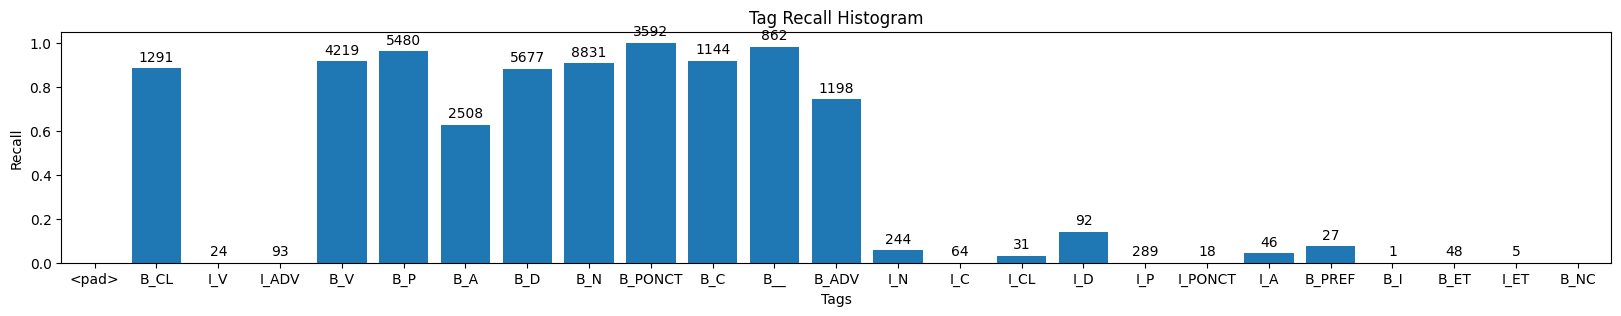

In [7]:

tags = [model.tags_vocab.rev_lookup(tag) for tag in range(len(model.tags_vocab))]

fig, ax = plt.subplots(figsize=(20, 3))  

# Plot the histogram
bars = ax.bar(tags, recall)

# Add class count annotations on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = int(class_counts[i])
    ax.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Tags')
ax.set_ylabel('Recall')
ax.set_title('Tag Recall Histogram')

# Display the plot
plt.show()

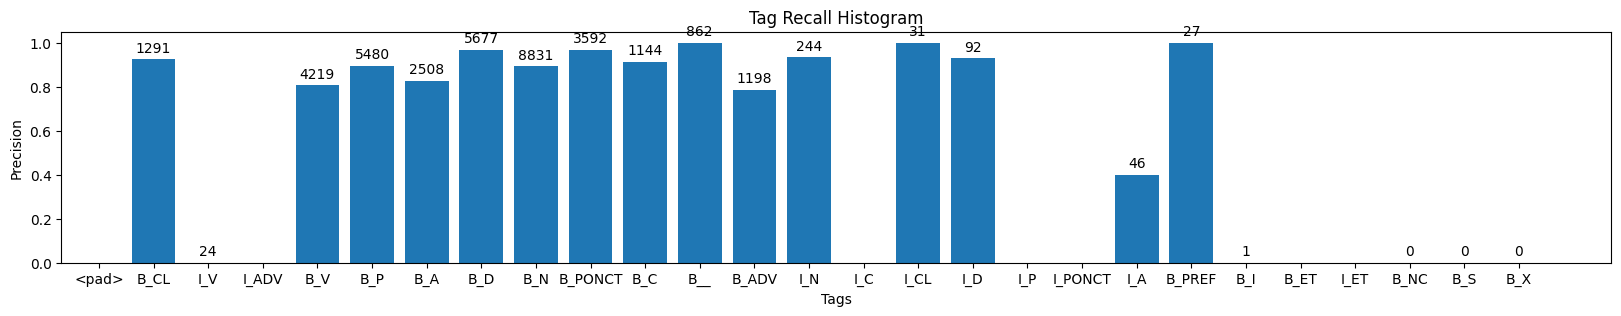

In [8]:
tags = [model.tags_vocab.rev_lookup(tag) for tag in range(len(model.tags_vocab))]

fig, ax = plt.subplots(figsize=(20, 3))  

# Plot the histogram
bars = ax.bar(tags, precision)

# Add class count annotations on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = int(class_counts[i])
    ax.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Tags')
ax.set_ylabel('Precision')
ax.set_title('Tag Recall Histogram')

# Display the plot
plt.show()

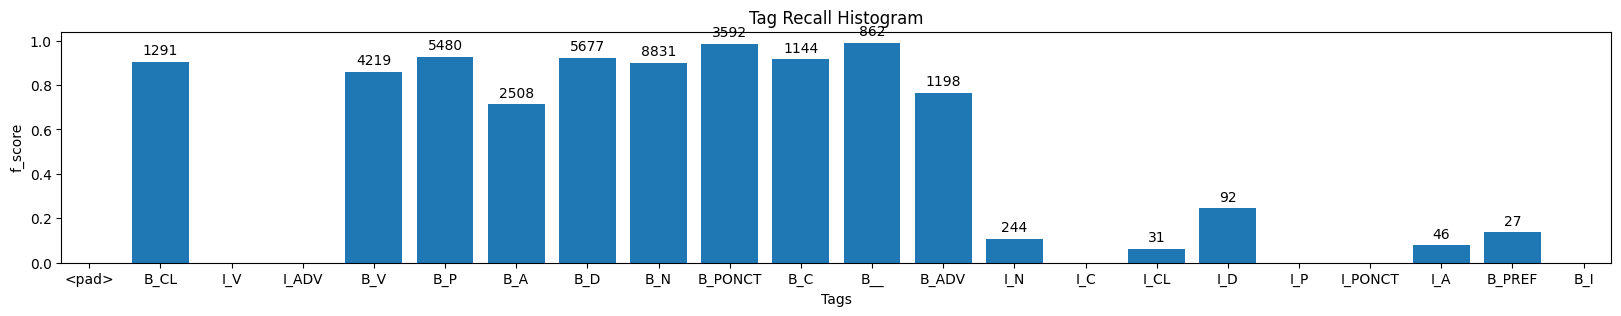

In [9]:
tags = [model.tags_vocab.rev_lookup(tag) for tag in range(len(model.tags_vocab))]

fig, ax = plt.subplots(figsize=(20, 3))  

# Plot the histogram
bars = ax.bar(tags, f_score)

# Add class count annotations on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = int(class_counts[i])
    ax.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Tags')
ax.set_ylabel('f_score')
ax.set_title('Tag Recall Histogram')

# Display the plot
plt.show()

## Analysis per MWE tags (B and I)

In [20]:
ex = {"tags":[], "P": [], "R":[], "f": []}
for tag, freq, P, R, f in zip(model.tags_vocab.idx2word, class_counts, precision, recall, f_score):
    if tag.startswith("I"):
        ex["tags"].append(tag)
        ex["P"].append(float(P))
        ex["R"].append(float(R))
        ex["f"].append(float(f))

In [21]:
ex

{'tags': ['I_V',
  'I_ADV',
  'I_N',
  'I_C',
  'I_CL',
  'I_D',
  'I_P',
  'I_PONCT',
  'I_A',
  'I_ET'],
 'P': [0.0,
  nan,
  0.9333333373069763,
  nan,
  1.0,
  0.9285714030265808,
  nan,
  nan,
  0.4000000059604645,
  nan],
 'R': [0.0,
  0.0,
  0.05737704783678055,
  0.0,
  0.032258063554763794,
  0.14130434393882751,
  0.0,
  0.0,
  0.043478261679410934,
  0.0],
 'f': [nan,
  nan,
  0.10810811072587967,
  nan,
  0.0625,
  0.24528302252292633,
  nan,
  nan,
  0.0784313753247261,
  nan]}

# MLP classifier error analysis

In [2]:
trainset     = mlp_dataset.MWEDataset("corpus/train.conllu", window_size = 6, isTrain = True)
testset      = mlp_dataset.MWEDataset("corpus/test.conllu", window_size = 6)

token Vocab size 35693
token Vocab size 35693


In [3]:
mod_dir = "trained_models"
mlp_mod = "mlp_mod.pth"
toksfile= "toks.txt"
tagsfile= "tags_posbi.txt"
modelmlp, toks_vocab, tags_vocab = MLPClassifier.load(os.path.join(mod_dir, mlp_mod),
                                                                   os.path.join(mod_dir, toksfile),
                                                                   os.path.join(mod_dir, tagsfile), window_size =6, embsize=64, hidden_size=64, drop_out=0.1, device="cpu")

modelmlp.to("cpu")
modelmlp.eval()

MLPClassifier(
  (word_embedding): Embedding(35693, 64)
  (FFW): Linear(in_features=64, out_features=28, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
  (net): MLP_baseline(
    (net): Sequential(
      (0): Linear(in_features=832, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): Dropout(p=0.1, inplace=False)
      (4): ReLU()
    )
  )
)

In [4]:
class_counts, TP, FP, FN, average_precision, average_recall, average_f1_score, weighted_f1_score, weighted_recall, weighted_precision = modelmlp.evaluate(testset.get_loader(batch_size = 500))

100%|███████████████████████████████████████████| 72/72 [00:00<00:00, 83.49it/s]


In [5]:
precision = TP/(FP+TP)
recall    = TP/(FN+TP)
f_score   = 2*(precision*recall)/(precision+recall)

In [7]:
print("tags-------class count --------recall----------precision---------f-score")
for tag in range(len(modelmlp.tags_vocab)):
    print(f"{modelmlp.tags_vocab.rev_lookup(tag)} %d   | Precision %.4f | Recall  %.4f |  F-score  %.4f   " % (int(class_counts[tag]), float(recall[tag]), float(precision[tag]), float(f_score[tag])))
    print()
print(f"weighted Precision %.4f | Recall  %.4f |  F-score  %.4f   " % (weighted_f1_score, weighted_recall, weighted_precision))

tags-------class count --------recall----------precision---------f-score
<unk> 0   | Precision nan | Recall  nan |  F-score  nan   

<pad> 0   | Precision nan | Recall  nan |  F-score  nan   

B_CL 1291   | Precision 0.8428 | Recall  0.9339 |  F-score  0.8860   

I_V 24   | Precision 0.0000 | Recall  nan |  F-score  nan   

I_ADV 93   | Precision 0.0000 | Recall  nan |  F-score  nan   

B_V 4219   | Precision 0.8483 | Recall  0.9577 |  F-score  0.8997   

B_P 5480   | Precision 0.9624 | Recall  0.8971 |  F-score  0.9286   

B_A 2508   | Precision 0.6423 | Recall  0.8330 |  F-score  0.7253   

B_D 5677   | Precision 0.8804 | Recall  0.9667 |  F-score  0.9215   

B_N 8831   | Precision 0.8906 | Recall  0.8606 |  F-score  0.8753   

B_PONCT 3592   | Precision 0.9944 | Recall  0.9800 |  F-score  0.9871   

B_C 1144   | Precision 0.9344 | Recall  0.8857 |  F-score  0.9094   

B__ 862   | Precision 0.9768 | Recall  0.9953 |  F-score  0.9859   

B_ADV 1198   | Precision 0.7504 | Recall  0.397

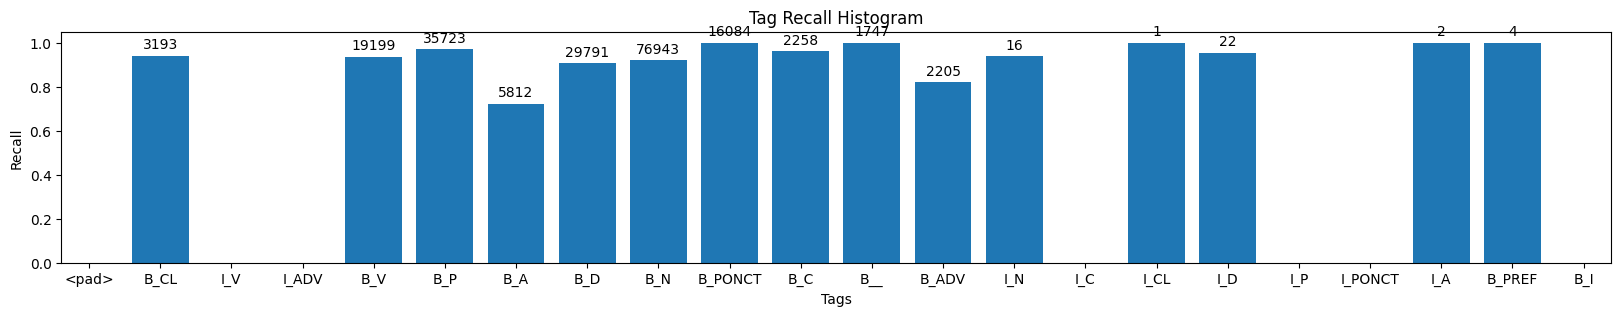

In [58]:
tags = [model.tags_vocab.rev_lookup(tag) for tag in range(len(model.tags_vocab))]

fig, ax = plt.subplots(figsize=(20, 3))  

# Plot the histogram
bars = ax.bar(tags, recall)

# Add class count annotations on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = int(class_counts[i])
    ax.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Tags')
ax.set_ylabel('Recall')
ax.set_title('Tag Recall Histogram')

# Display the plot
plt.show()

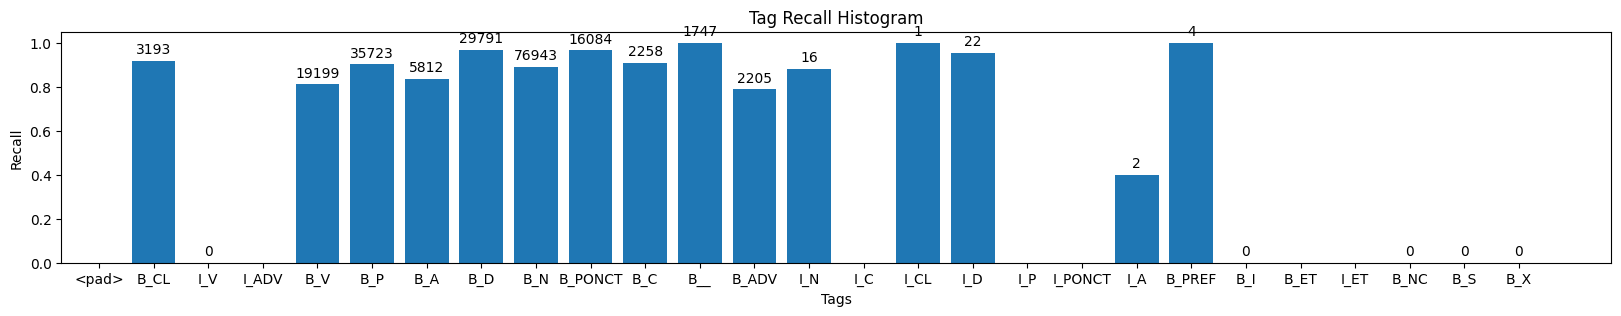

In [59]:
tags = [model.tags_vocab.rev_lookup(tag) for tag in range(len(model.tags_vocab))]

fig, ax = plt.subplots(figsize=(20, 3))  

# Plot the histogram
bars = ax.bar(tags, precision)

# Add class count annotations on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = int(class_counts[i])
    ax.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Tags')
ax.set_ylabel('Recall')
ax.set_title('Tag Recall Histogram')

# Display the plot
plt.show()

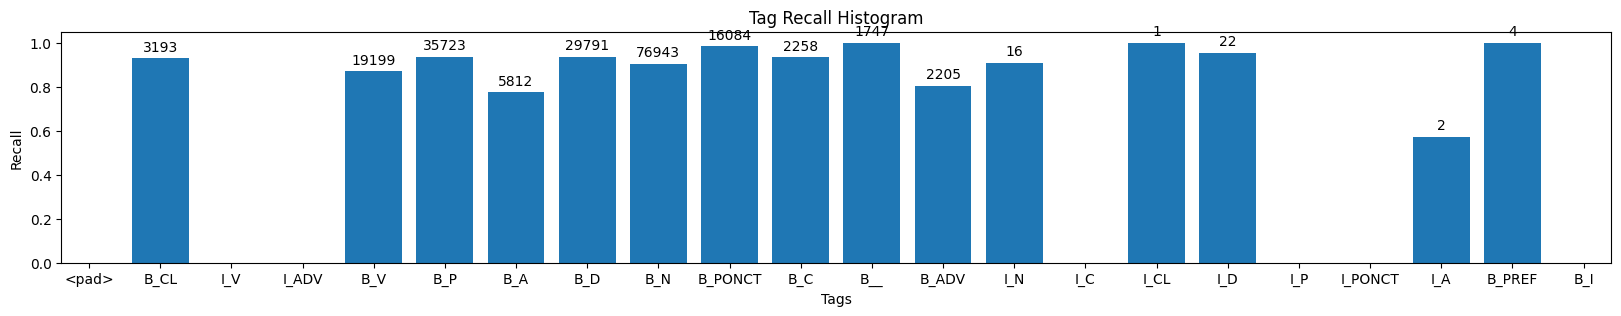

In [60]:
tags = [model.tags_vocab.rev_lookup(tag) for tag in range(len(model.tags_vocab))]

fig, ax = plt.subplots(figsize=(20, 3))  

# Plot the histogram
bars = ax.bar(tags, f_score)

# Add class count annotations on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = int(class_counts[i])
    ax.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Tags')
ax.set_ylabel('Recall')
ax.set_title('Tag Recall Histogram')

# Display the plot
plt.show()